<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Máster Universitario en Análisis y Visualización de Datos Masivos/ Visual Analytics and Big Data
</header1></center>
<left><h1>
Estudio de seguridad y predicción a largo plazo: Alta a los 10 años en pacientes con cáncer de vejiga no musculoinvasivo</header1></left>

Presentado por: Maria Martin Campano  <br>
Fecha: 10/07/2024

## Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

## Carga de Datos

In [2]:
#Código para cargar el Dataset

url = ''
dataset1 = pd.read_csv(url, sep=';')
dataset1 = dataset1.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)


In [3]:
#Código para cargar el Dataset

url2 = ''
dataset2 = pd.read_csv(url2, sep=';', encoding='latin1')
dataset2 = dataset2.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)



In [4]:
df_filtrado = dataset2[dataset2['estado'] != '6']


In [5]:
dataset = pd.concat([df_filtrado, dataset1])


In [6]:
def convertir_a_rango_edad(edad):
    if pd.isnull(edad):  
        return 'Desconocido'
    
    if isinstance(edad, str):
        try:
            edad = float(edad.replace(',', '.'))  
        except ValueError:
            return 'Desconocido'  
    
    if isinstance(edad, (int, float)):
        if edad <= 20:
            return '0-20'
        elif edad <= 40:
            return '21-40'
        elif edad <= 60:
            return '41-60'
        elif edad <= 80:
            return '61-80'
        else:
            return '81+'
    
    return 'Desconocido'  

# Aplicar la función de conversión al dataset y crear la nueva columna 'rango_edad'
dataset['rango_edad'] = dataset['edad'].apply(convertir_a_rango_edad)

# Eliminar la columna original de 'edad'
dataset.drop(columns=['edad'], inplace=True)

# Visualizar dataset combinado
dataset

,Unnamed: 0,orden,NH,RECIDIVAALTA,ACTUA,estado,rtu,ultima,tle,seguim,...,DIAGNOSTICORECIDIVA,APRECIDIVA,AÑOSRECIDIVA,TAMAÑO,nº,ESTADIOCORREGIDO,TRATAMIENTOSINO,LINFA,ESTADIOMODIFICADO,rango_edad
0,1,3335,NaN,NaN,89.0,5,13/7/20,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61-80
1,2,1327,NaN,NaN,63.0,5,19/12/06,NaN,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-20
19,20,163,279442.0,NaN,4.0,9,13/6/94,24/2/99,56.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61-80
20,21,303,279007.0,NaN,4.0,9,25/5/94,1/10/97,41.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61-80
23,24,39,247396.0,NaN,4.0,9,25/6/93,1/2/94,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,441,6.1,31674.0,0.0,4.0,6,1993-03-24,2013-05-16,242.0,294.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,NaN,41-60
441,442,995.1,26523.0,0.0,3.0,6,2008-12-11,2014-11-01,72.0,160.0,...,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,21-40
442,443,485.0,24487.0,0.0,4.0,6,1988-05-06,2005-11-03,210.0,210.0,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,61-80
443,444,263.1,23282.0,0.0,3.0,6,1995-02-20,2000-01-05,64.0,64.0,...,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,1.0,41-60


In [7]:
# Lista de columnas a excluir
exclude_columns = ['rango_edad', 'comentar']

# Obtener el resto de las columnas
columns_to_convert = [col for col in dataset.columns if col not in exclude_columns]

# Convertir las columnas seleccionadas a tipo float
dataset[columns_to_convert] = dataset[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Verificar el resultado
dataset

,Unnamed: 0,orden,NH,RECIDIVAALTA,ACTUA,estado,rtu,ultima,tle,seguim,...,DIAGNOSTICORECIDIVA,APRECIDIVA,AÑOSRECIDIVA,TAMAÑO,nº,ESTADIOCORREGIDO,TRATAMIENTOSINO,LINFA,ESTADIOMODIFICADO,rango_edad
0,1,3335.0,NaN,NaN,89.0,5.0,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61-80
1,2,1327.0,NaN,NaN,63.0,5.0,NaN,NaN,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-20
19,20,163.0,279442.0,NaN,4.0,9.0,NaN,NaN,56.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61-80
20,21,303.0,279007.0,NaN,4.0,9.0,NaN,NaN,41.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61-80
23,24,39.0,247396.0,NaN,4.0,9.0,NaN,NaN,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,441,6.1,31674.0,0.0,4.0,6.0,NaN,NaN,242.0,294.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,NaN,41-60
441,442,995.1,26523.0,0.0,3.0,6.0,NaN,NaN,72.0,160.0,...,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,21-40
442,443,485.0,24487.0,0.0,4.0,6.0,NaN,NaN,210.0,210.0,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,61-80
443,444,263.1,23282.0,0.0,3.0,6.0,NaN,NaN,64.0,64.0,...,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,1.0,41-60


In [8]:
# Guardar el conjunto de datos combinado como archivo CSV
dataset.to_csv('/Users/mariamartincampano/Desktop/TFM/combined_dataset.csv', sep=';', decimal=',', index=False)

In [9]:
# 1. Análisis descriptivo
descripcion = dataset.describe()
print(descripcion)

        Unnamed: 0         orden            NH  RECIDIVAALTA        ACTUA  \
count  4836.000000   4829.000000  2.965000e+03    445.000000  3020.000000   
mean   2463.495451   1452.031965  5.253929e+05      0.040449     0.866556   
std    1406.552751    922.471101  4.680308e+05      0.197233     2.299619   
min       1.000000      1.000000  3.540000e+02      0.000000     0.000000   
25%    1258.750000    703.800000  2.178210e+05      0.000000     0.000000   
50%    2468.500000   1388.000000  4.118110e+05      0.000000     0.000000   
75%    3679.250000   2209.000000  7.276930e+05      0.000000     2.000000   
max    4889.000000  14211.000000  6.983529e+06      1.000000    89.000000   

            estado  rtu  ultima          tle       seguim  ...      RERTU  \
count  4812.000000  0.0     0.0  4740.000000  2958.000000  ...  51.000000   
mean      3.549252  NaN     NaN    39.213291    62.346180  ...   0.490196   
std       2.697194  NaN     NaN    95.931586    69.530698  ...   0.731370  

In [10]:
alta_df = dataset[dataset['estado'] == 6]

# Filtrar los datos para aquellos con más de 10 años de seguimiento
pacientes_cancer_vejiga = alta_df[(alta_df['RECIDIVAALTA'] == 1)]

# Calcular probabilidad de recidiva
num_recidiva = len(alta_df)
probabilidad_recidiva =  len(pacientes_cancer_vejiga)/num_recidiva 

print("Probabilidad de recidiva de cáncer de vejiga después de 10 años de seguimiento:", probabilidad_recidiva)

Probabilidad de recidiva de cáncer de vejiga después de 10 años de seguimiento: 0.03908045977011494


In [11]:
# Eliminar la columna original de fecha
dataset_cleaned = alta_df.drop(columns=['rtu', 'ultima','RERTU','comentar'])

# Iterar sobre las columnas y aplicar LabelEncoder si es necesario
for col in dataset_cleaned.columns:
    if dataset_cleaned[col].dtype == 'object':  # Verificar si es una columna de tipo objeto (categórica)
        dataset_cleaned[col] = dataset_cleaned[col].astype(str)  # Convertir a tipo string
        dataset_cleaned[col] = LabelEncoder().fit_transform(dataset_cleaned[col])  # Aplicar LabelEncoder

dataset_cleaned = dataset_cleaned.dropna(subset=['RECIDIVA'])

# Definir las características (X) y la variable objetivo (y)
X = dataset_cleaned.drop(columns=['RECIDIVA']) 
y = dataset_cleaned['RECIDIVA']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador RandomForest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
rf_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy:.2f}')

# Mostrar reporte de clasificación
print(classification_report(y_test, y_pred))

# Verificar la distribución de clases en y_train
class_distribution = pd.Series(y_train).value_counts()
print("Distribución de clases en y_train:")
print(class_distribution)

Accuracy del modelo: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        87

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87

Distribución de clases en y_train:
0.0    347
1.0      1
Name: RECIDIVA, dtype: int64


In [12]:
# Calcular la prevalencia de la recidiva
recidiva_count = dataset['RECIDIVA'].sum()
total_patients = dataset.shape[0]
prevalence_recurrence = recidiva_count / total_patients

print(f'Prevalencia de la recidiva: {prevalence_recurrence:.2%}')

Prevalencia de la recidiva: 43.73%


In [13]:
# Eliminar filas con valores faltantes en las columnas de interés
dataset_clean = dataset.dropna(subset=['ESTADIO', 'rango_edad', 'sexo'])

# Análisis exploratorio: contar la frecuencia de cada combinación de estadio, edad y sexo
contingency_table = pd.crosstab(index=[dataset_clean['rango_edad'], dataset_clean['sexo']], columns=dataset_clean['ESTADIO'])
print(contingency_table)

ESTADIO           0.0   1.0  2.0  3.0  4.0  5.0
rango_edad  sexo                               
0-20        1.0     1     1    0    0    0    0
            73.0    0     0    0    0    0    1
21-40       1.0    23    23    4    0    0    0
            2.0     8     6    3    0    0    0
41-60       0.0     1     0    0    0    0    0
            1.0   357   432   67   12    2    9
            2.0    68    48    9    2    0    3
            11.0    0     0    0    1    0    0
61-80       0.0     0     1    0    0    0    0
            1.0   956  1476  235   48    6   28
            2.0   142   211   35    4    3    0
81+         0.0     1     0    0    0    0    0
            1.0   154   228   29    4    0    7
            2.0    36    43   14    1    0    0
Desconocido 1.0    11    43    7    0    0    1
            2.0     1     1    0    0    0    0


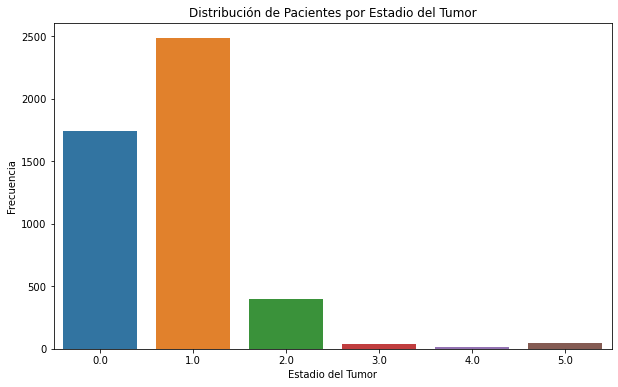

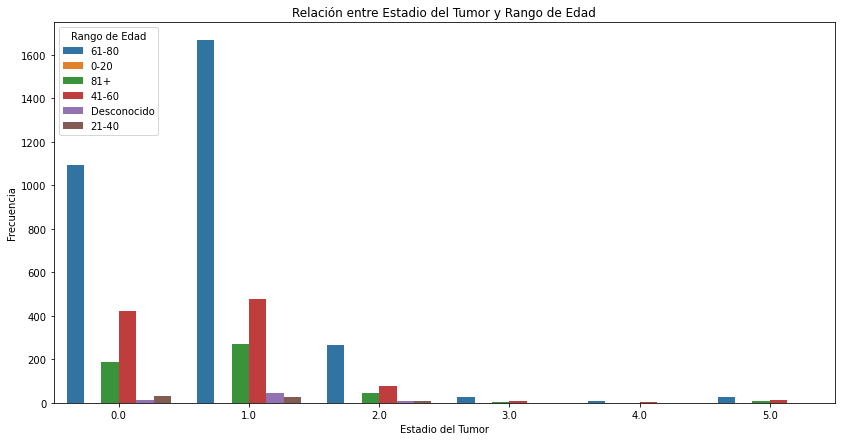

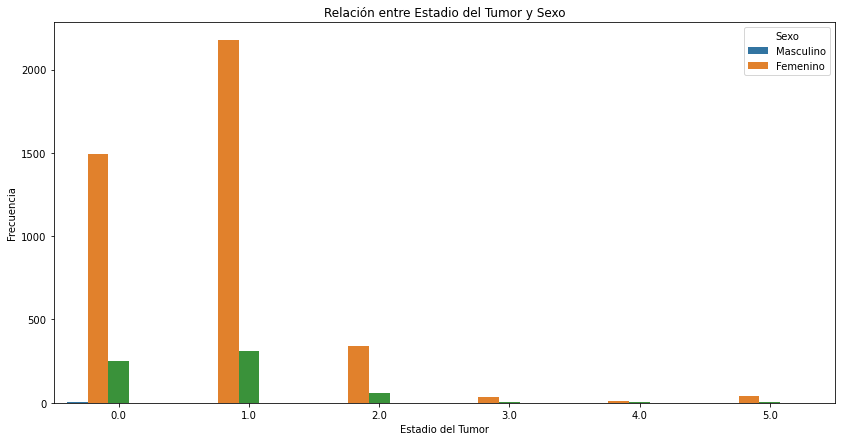

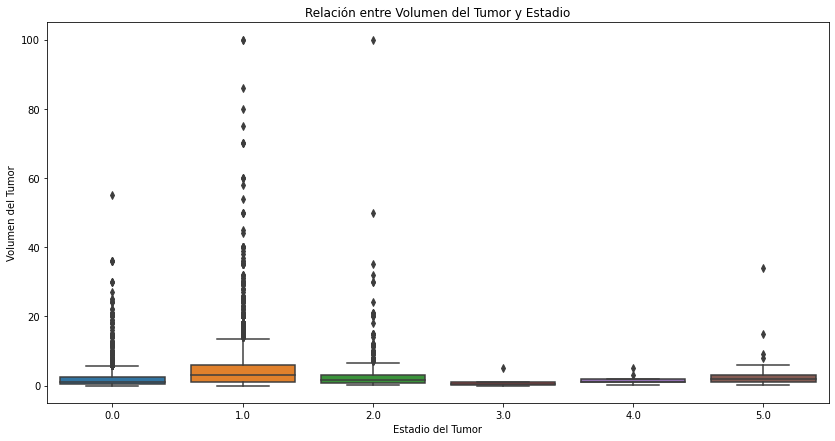

In [14]:
# Limpiar datos faltantes si es necesario
dataset_clean = dataset.dropna(subset=['ESTADIO', 'rango_edad', 'sexo', 'volumen'])

# 1. Distribución de pacientes por estadio del tumor
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset_clean, x='ESTADIO')
plt.title('Distribución de Pacientes por Estadio del Tumor')
plt.xlabel('Estadio del Tumor')
plt.ylabel('Frecuencia')
plt.show()

# 2. Relación entre estadio del tumor y edad
plt.figure(figsize=(14, 7))
sns.countplot(data=dataset_clean, x='ESTADIO', hue='rango_edad')
plt.title('Relación entre Estadio del Tumor y Rango de Edad')
plt.xlabel('Estadio del Tumor')
plt.ylabel('Frecuencia')
plt.legend(title='Rango de Edad')
plt.show()

# 3. Relación entre estadio del tumor y sexo
plt.figure(figsize=(14, 7))
sns.countplot(data=dataset_clean, x='ESTADIO', hue='sexo')
plt.title('Relación entre Estadio del Tumor y Sexo')
plt.xlabel('Estadio del Tumor')
plt.ylabel('Frecuencia')
plt.legend(title='Sexo', labels=['Masculino', 'Femenino'])
plt.show()

# 4. Relación entre volumen del tumor y estadio
plt.figure(figsize=(14, 7))
sns.boxplot(data=dataset_clean, x='ESTADIO', y='volumen')
plt.title('Relación entre Volumen del Tumor y Estadio')
plt.xlabel('Estadio del Tumor')
plt.ylabel('Volumen del Tumor')
plt.show()



In [15]:
# Convertir 'seguim' a tipo numérico (asumiendo que está en meses)
dataset['seguim'] = pd.to_numeric(dataset['seguim'], errors='coerce')

# Convertir meses a años dividiendo entre 12
dataset['seguim_anios'] = dataset['seguim'] / 12

# Filtrar los casos donde 'seguim_anios' es mayor o igual a 10
casos_mas_10_anios = dataset[dataset['seguim_anios'] >= 10]

# Filtrar los casos donde el estado no es 2, 3, 6, 8 o 9
estado_no_permitido = [2, 3, 6, 8, 9]
estado_no_igual_2_3_6_8_9 = casos_mas_10_anios[~casos_mas_10_anios['estado'].isin(estado_no_permitido)]

# Mostrar los pacientes que deberían recibir el alta
print("Pacientes que deberían recibir el alta:")
print(len(estado_no_igual_2_3_6_8_9))

Pacientes que deberían recibir el alta:
201


Paso 1: Calcular el Ahorro de la Sanidad
Ahorro Anual por Paciente: 10,000 (supuesto).

Ahorro Total para los 201 Pacientes: 

201 pacientes× 379 euros/paciente=76.185,3 euros .

Paso 2: Calcular el Costo de las Recaídas
Número de Pacientes que Podrían Recaer: 

3.9% de 201 pacientes=⌈0.039×201⌉=11 pacientes.

Costo Total de las Recaídas: 

11 pacientes× 379 euros/paciente= 4169 euros.

Conclusión:
Dinero Ahorrado por la Sanidad: 76.185,3 euros.
Potencial Costo por Recaídas: 4169 euros.

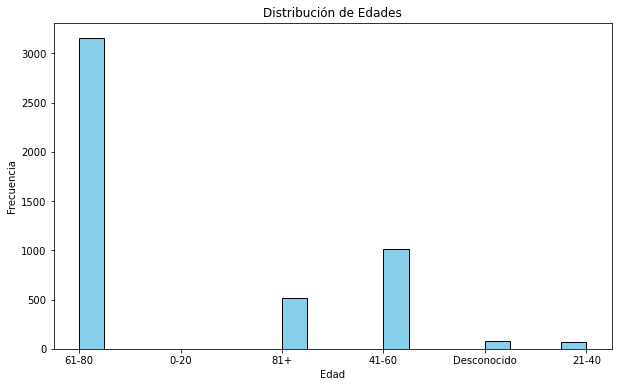

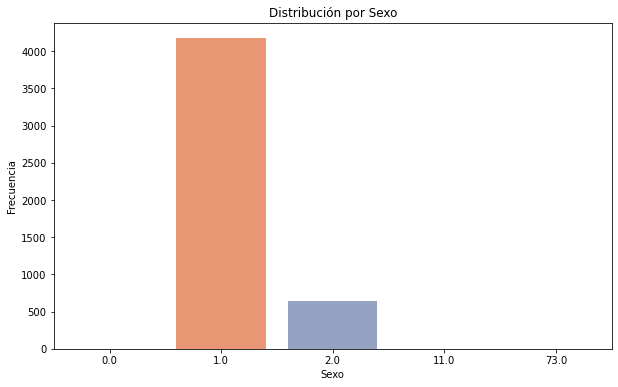

In [16]:
#histograma de edades
plt.figure(figsize=(10, 6))
plt.hist(dataset['rango_edad'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.savefig('distribucion_edades.png')
plt.show()

#gráfico de barras de sexo
plt.figure(figsize=(10, 6))
sns.countplot(x='sexo', data=dataset, palette='Set2')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.savefig('distribucion_sexo.png')
plt.show()
